# State Of Data Brasil 2022 - Análise Exploratória

# 1. Introdução

### 1. 1 . Contexto

O **State of Data Brazil** ([link](https://www.bain.com/contentassets/16494c60fcd045188615f05e728385b3/state-of-data2022_um-raio-x-dos-profissionais-de-dados-do-brasil.pdf)), realizada pelo [Data Hackers](https://www.datahackers.com.br/) e pela [Bain & Company](https://www.bain.com/), é uma das
maiores pesquisas sobre o mercado brasileiro de dados. Dentre os assuntos pesquisado na
última pesquisa (2022), foi mapeado o peral atual das três maiores proassões da área de
dados do Brasil: engenheiro de dados, cientista de dados e analista de dados. O relatório
completo pode ser acessado neste [link](https://www.bain.com/contentassets/16494c60fcd045188615f05e728385b3/state-of-data2022_um-raio-x-dos-profissionais-de-dados-do-brasil.pdf).

### 1. 2. Objetivo

Analisar a distribuição das faixas de salário para os profissionais de nivel júnior de experiência para o cargo de analista, cientista e engenheiro de dados.

# 2. Dados

### 2. 1 . Descrição

Os dados da pesquisa foram disponilizados no site do Keggle ([link](https://www.kaggle.com/datasets/datahackers/state-of-data-2022)). O arquivo está no formato **CSV** (do inglês valores separados por vírgula), possuí **353 colunas** e **4271 linhas** e"**pesa**" por volta de **10 MB**.

### 2. 2 . Upload

Acesse o Keggle ([link](https://www.kaggle.com/datasets/datahackers/state-of-data-2022)), faça o *download* do arquivo no formato CSV e então, o seu upload no ambiente do Google Colab.

# 3. Processamento

### 3. 1 . Leitura

In [199]:
import pandas as pd

data = list()

with open(file="State_of_data_2022.csv", mode="r") as fp:
  header = fp.readline()
  line = fp.readline() # linhas como texto

  while line:
    line = line.split(sep=',') # linha como lista
    data.append({"Cargo": line[21], "Experiencia": line[22], "Salário": line[23]})
    line = fp.readline() # linhas como texto

    data_table = pd.DataFrame(data)

In [200]:
data_table.head(n=15)

,Cargo,Experiencia,Salário
0,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês
1,Supervisor/Coordenador,,
2,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
4,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
5,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês
6,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês
7,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
8,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês
9,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês


In [201]:
data_table.shape

(4271, 3)

### 3. 2 . Limpeza

In [202]:
data_table = data_table.replace('', pd.NA)
data_table = data_table.dropna()

In [203]:
data_table.shape

(2790, 3)

**Remoção de Linhas Corrompidas**

In [204]:
data_table['Salário'] = data_table['Salário'].apply(lambda row: row if 'R$' in row else pd.NA)
data_table = data_table.dropna()

In [205]:
data_table.shape

(2386, 3)

**Seleção das Linhas com Cargo de Interesse**

In [210]:
positions = [
    'Analista de Dados/Data Analyst',
    'Cientista de Dados/Data Scientist',
    'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect']

data_table['Cargo'] = data_table['Cargo'].apply(lambda row: row if row in positions else pd.NA)
data_table = data_table.dropna()

In [211]:
data_table.shape

(1336, 3)

**Limpeza do nome dos cargos**

In [217]:
labels = ['Analista', 'Cientista', 'Engenheira']
labels = dict(zip(positions, labels))
data_table['Cargo'] = data_table['Cargo'].apply(lambda row: labels[row])

Os dados dos processos serão salvos.

**Remoção de valores faltantes:**

In [218]:
data_table.head(n=15)

,Cargo,Experiencia,Salário
3,Cientista,Sênior,de R$ 12.001/mês a R$ 16.000/mês
18,Engenheira,Pleno,de R$ 6.001/mês a R$ 8.000/mês
23,Engenheira,Sênior,de R$ 12.001/mês a R$ 16.000/mês
29,Cientista,Júnior,de R$ 8.001/mês a R$ 12.000/mês
30,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês
31,Engenheira,Júnior,de R$ 2.001/mês a R$ 3.000/mês
37,Engenheira,Júnior,de R$ 2.001/mês a R$ 3.000/mês
41,Engenheira,Júnior,de R$ 4.001/mês a R$ 6.000/mês
45,Cientista,Sênior,de R$ 6.001/mês a R$ 8.000/mês
49,Engenheira,Sênior,de R$ 8.001/mês a R$ 12.000/mês


In [219]:
data_table.to_csv("data.csv", header=True, index=False)

# 4. Insight

### 4. 1. Análise da quantidade de pessoas do nível experiência Júnior por faixa de salário e cargo.

**Agrupamento e agregações**

Uma coluna unitária denominada **"Quantidade"** é criada para simplificar o agrupamento e as agregações.

In [220]:
data_table['Quantidade'] = 1

In [221]:
data_table.head(15)

,Cargo,Experiencia,Salário,Quantidade
3,Cientista,Sênior,de R$ 12.001/mês a R$ 16.000/mês,1
18,Engenheira,Pleno,de R$ 6.001/mês a R$ 8.000/mês,1
23,Engenheira,Sênior,de R$ 12.001/mês a R$ 16.000/mês,1
29,Cientista,Júnior,de R$ 8.001/mês a R$ 12.000/mês,1
30,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês,1
31,Engenheira,Júnior,de R$ 2.001/mês a R$ 3.000/mês,1
37,Engenheira,Júnior,de R$ 2.001/mês a R$ 3.000/mês,1
41,Engenheira,Júnior,de R$ 4.001/mês a R$ 6.000/mês,1
45,Cientista,Sênior,de R$ 6.001/mês a R$ 8.000/mês,1
49,Engenheira,Sênior,de R$ 8.001/mês a R$ 12.000/mês,1



Os dados são agregados pelas colunas de interesse, aplicando a operação de soma à recém-criada coluna "Quantidade".

In [222]:
salario_cargo_experiencia_agg = data_table[['Cargo', 'Experiencia', 'Salário','Quantidade']].groupby(['Cargo' , 'Experiencia' , 'Salário']).agg('sum').reset_index()

In [223]:
salario_cargo_experiencia_agg.head(n=15)

,Cargo,Experiencia,Salário,Quantidade
0,Analista,Júnior,Menos de R$ 1.000/mês,4
1,Analista,Júnior,de R$ 1.001/mês a R$ 2.000/mês,26
2,Analista,Júnior,de R$ 2.001/mês a R$ 3.000/mês,34
3,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês,46
4,Analista,Júnior,de R$ 4.001/mês a R$ 6.000/mês,54
5,Analista,Júnior,de R$ 6.001/mês a R$ 8.000/mês,12
6,Analista,Júnior,de R$ 8.001/mês a R$ 12.000/mês,1
7,Analista,Pleno,de R$ 1.001/mês a R$ 2.000/mês,1
8,Analista,Pleno,de R$ 12.001/mês a R$ 16.000/mês,5
9,Analista,Pleno,de R$ 16.001/mês a R$ 20.000/mês,1


A coluna "Salário" é considerada ordinal, o que significa que pode ser naturalmente ordenada. No entanto, devido à sua natureza textual, a ordenação correta não é possível, já que o padrão é a ordenação por ordem alfabética. Por isso, vamos introduzir uma coluna de suporte chamada "Ordem".

In [224]:
salario_ordem = {
    'Menos de R$ 1.000/mês': 0,
    'de R$ 1.001/mês a R$ 2.000/mês': 1,
    'de R$ 2.001/mês a R$ 3.000/mês': 2,
    'de R$ 3.001/mês a R$ 4.000/mês': 3,
    'de R$ 4.001/mês a R$ 6.000/mês': 4,
    'de R$ 6.001/mês a R$ 8.000/mês': 5,
    'de R$ 8.001/mês a R$ 12.000/mês': 6,
    'de R$ 12.001/mês a R$ 16.000/mês': 7,
    'de R$ 16.001/mês a R$ 20.000/mês': 8,
    'de R$ 20.001/mês a R$ 25.000/mês': 9,
    'de R$ 25.001/mês a R$ 30.000/mês': 10,
    'de R$ 30.001/mês a R$ 40.000/mês': 11,
    'Acima de R$ 40.001/mês': 12
}

In [226]:
salario_cargo_experiencia_agg['Ordem'] = salario_cargo_experiencia_agg['Salário'].apply(lambda row: salario_ordem[row])
salario_cargo_experiencia_agg = salario_cargo_experiencia_agg.sort_values(by=['Cargo' , 'Experiencia','Ordem'], ascending=[True, True, True])

In [227]:
salario_cargo_experiencia_agg.head(n=30)

,Cargo,Experiencia,Salário,Quantidade,Ordem
0,Analista,Júnior,Menos de R$ 1.000/mês,4,0
1,Analista,Júnior,de R$ 1.001/mês a R$ 2.000/mês,26,1
2,Analista,Júnior,de R$ 2.001/mês a R$ 3.000/mês,34,2
3,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês,46,3
4,Analista,Júnior,de R$ 4.001/mês a R$ 6.000/mês,54,4
5,Analista,Júnior,de R$ 6.001/mês a R$ 8.000/mês,12,5
6,Analista,Júnior,de R$ 8.001/mês a R$ 12.000/mês,1,6
7,Analista,Pleno,de R$ 1.001/mês a R$ 2.000/mês,1,1
10,Analista,Pleno,de R$ 2.001/mês a R$ 3.000/mês,2,2
13,Analista,Pleno,de R$ 3.001/mês a R$ 4.000/mês,12,3


**Visualização**

Por último, vamos aplicar um filtro para selecionar apenas os profissionais com nível de experiência Júnior e criar um gráfico de barras correspondente.

In [228]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Experiencia'] == 'Júnior']

In [229]:
import seaborn as sns

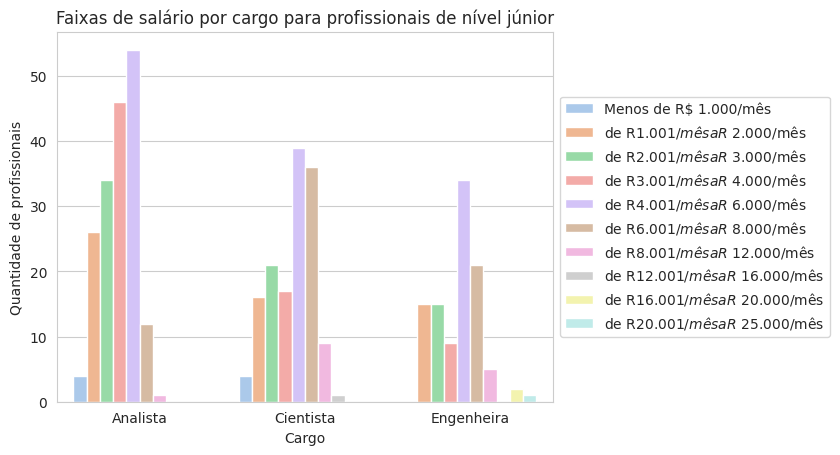

In [230]:
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Cargo', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixas de salário por cargo para profissionais de nível júnior')
  plot.set_ylabel('Quantidade de profissionais')
  plot.set_xlabel('Cargo')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Resultados**

- Distribuição de Salários:

Os analistas têm uma distribuição mais concentrada nas faixas salariais de mil a seis mil reais por mês.
Em contraste, os cientistas e engenheiros de dados concentram-se principalmente nas faixas de quatro a oito mil reais por mês.

- Representatividade Profissional:

Os analistas compõem a maioria dos profissionais pesquisados.

- Conclusão:

Embora os profissionais de análise de dados possam receber um pouco menos em comparação com os de ciência ou engenharia de dados, a demanda por analistas pode ser maior, indicando uma possível abundância de vagas disponíveis nessa área específica.

